## Раздел 0: Импорты библиотек и исходных данных
### 0.0 Импорты необходимых библиотек

In [1]:
import pandas as pd # импорт библиотеки для работы с DataFrame
import statistics # импорт библиотеки для вычисления статистических показателей
import re # импорт библиотеки для работы с регулярными выражениями
# импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pymystem3 import Mystem # импорт библиотеки для лемматизации
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # импорт библиотеки для получения векторов признаков
import nltk # импорт библиотеки NLTK
from nltk.tokenize import word_tokenize # импорт функции для токенизации 
# загрузка списков стоп слов 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/vadim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 0.1 Создаем таблицу для хранения данных в DataFrame

In [2]:
columns = [
    "id", "tdate", "tname", "ttext", "ttype", 
    "trep", "tfav", "tstcount", "tfol", 
    "tfrien", "listcount", "unknown"
]

positive_df = pd.read_csv("positive.csv", delimiter=";", names=columns, nrows=5000)
negative_df = pd.read_csv("negative.csv", delimiter=";", names=columns, nrows=5000)

df = pd.concat([positive_df, negative_df]).reset_index(drop=True)

print(f"(строки, колонки): {df.shape}")
df

(строки, колонки): (10000, 12)


,id,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,unknown
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,409766329734795264,1386530880,Anastasievnaa,Натааааш. у тебя было классное ДР =( и хрен у ...,-1,0,0,0,2002,30,21,0
9996,409766375364644864,1386530891,EmoKingSize,ой(( я совсем забыла восстановить старый аккау...,-1,0,0,0,5154,41,49,0
9997,409766474010886144,1386530915,yegorushki,Ну и где ночной твиттер? Все спят что ли? Так ...,-1,0,0,0,1456,48,56,0
9998,409766520009793536,1386530926,blond_4,"Девочка моя,спасибо тебе за этот вечер .мне оч...",-1,0,0,0,99,14,14,0


## Раздел 1: Статистический анализ текстового корпуса Рубцовой
### 1.0 Создание колонки с длинной текстов

In [3]:
# Создаем колонку с длинной текстов с помощью токенизации каждого ряда
df['tlength'] = df['ttext'].apply(lambda x: len(word_tokenize(str(x))))
df.head()

,id,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,unknown,tlength
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0,22
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2,17
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0,15
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0,35
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1,26


### 1.1 Проверка на пропущенные значения

In [4]:
# Суммируем все пропущенные значения в каждом ряду
df.isnull().sum() 

id           0
tdate        0
tname        0
ttext        0
ttype        0
trep         0
tfav         0
tstcount     0
tfol         0
tfrien       0
listcount    0
unknown      0
tlength      0
dtype: int64

### 1.2 Вычисление средней, медианы и моды

In [5]:
# Выводим среднее, медиану и моду длин текстов с помощью библеотеки statistics
print(f'Средняя длина текстов: {statistics.mean(df["tlength"])}\n'
      f'Медиана длины текстов: {statistics.median(df["tlength"])}\n'
      f'Мода длины текстов: {statistics.mode(df["tlength"])}')

Средняя длина текстов: 17.6985
Медиана длины текстов: 16.0
Мода длины текстов: 13


## Раздел 2: Визуальный анализ текстового корпуса Рубцовой
### 2.0 Построение линейной диаграммы

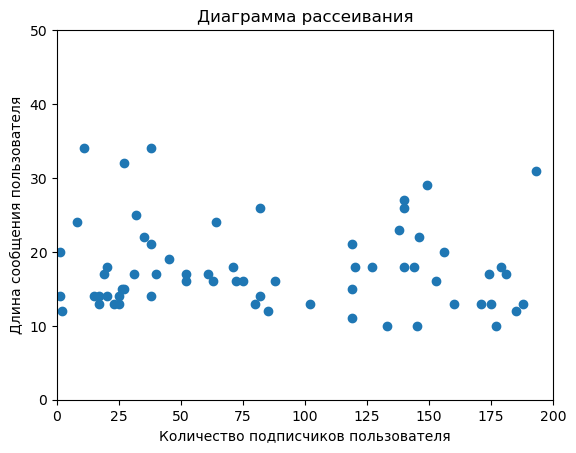

In [6]:
# Строим диаграмму рассеивания с помощью библиотеки matplotlib
x = df['tfol'].head(500)
y = df['tlength'].head(500)
plt.scatter(x, y)

plt.xlabel('Количество подписчиков пользователя')
plt.ylabel('Длина сообщения пользователя')
plt.title('Диаграмма рассеивания')
plt.xlim(0, 200)
plt.ylim(0, 50)

plt.show()

### 2.1 Построение столбчатой диаграммы

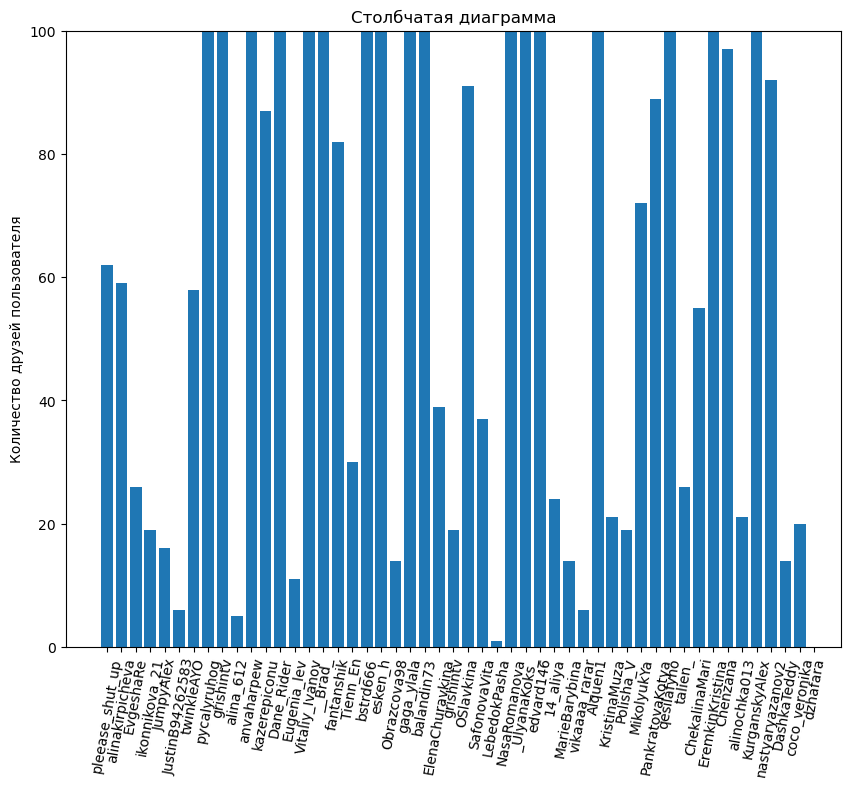

In [7]:
# Строим столбчатую диаграмму с помощью библиотеки matplotlib
plt.figure(figsize=(10, 8))
x = df['tname'].head(50)
y = df['tfrien'].head(50)
plt.bar(x, y)
plt.title("Столбчатая диаграмма")
plt.ylabel('Имя пользователя')
plt.ylabel('Количество друзей пользователя')
plt.xticks(range(len(x)), x, rotation = 80)
plt.ylim(0, 100)

plt.show()

### 2.2 Построение тепловой карты
1. data: DataFrame или массив. Это набор данных, который будет использоваться для создания тепловой карты.
2. vmin, vmax: Минимальное и максимальное значения для шкалы цветовой карты. 
3. cmap: Цветовая карта: какие цвета будут использоваться для отображения данных на тепловой карте.
4. center: Центральное значение, вокруг которого будут варьироваться цвета.
5. robust: Если True, цветовая карта будет более устойчивой к выбросам.
6. annot: Если True, числовые значения будут аннотированы в ячейках тепловой карты.
7. fmt: Формат чисел для аннотаций (например, '.2g' - два знака после запятой).
8. annot_kws: Дополнительные параметры для настройки аннотаций, такие как размер шрифта, цвет и др.
9. linewidths: Ширина линий между ячейками.
10. linecolor: Цвет линий между ячейками.
11. cbar: Если True, будет отображена цветовая шкала.
12. cbar_kws: Дополнительные параметры для настройки цветовой шкалы, такие как расположение, размер и др.
13. cbar_ax: Ось для цветовой шкалы, если она создана вручную.
14. square: Если True, гарантирует, что ячейки тепловой карты будут квадратными.
15. xticklabels, yticklabels: Управляют отображением подписей осей x и y. 'auto' автоматически подстраивается под данные.
16. mask: Матрица маскирования, которая может быть использована для скрытия некоторых ячеек на тепловой карте.
17. ax: Ось, на которой будет построена тепловая карта. 
18. kwargs: Другие параметры, которые могут быть переданы для настройки внешнего вида тепловой карты, такие как размер графика, цвет фона и др.



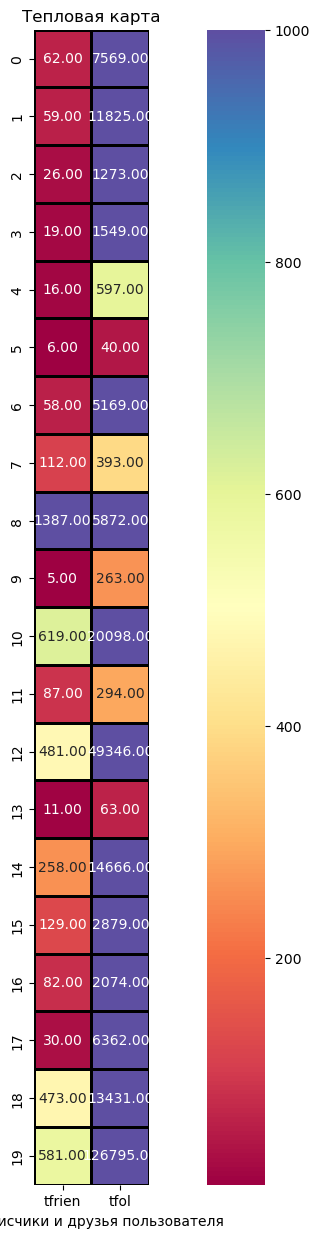

In [8]:
# Строим тепловую карту с помощью библиотеки seaborn
plt.figure(figsize=(15, 15))
sns.heatmap(df[[ "tfrien", 'tfol']].head(20), annot=True, cmap="Spectral", cbar=True, fmt='.2f', vmax=1000, square=True, linecolor="black", linewidth=1)
plt.title("Тепловая карта")
plt.xlabel('Подписчики и друзья пользователя')

plt.show()

### 2.3 Построение гистограммы

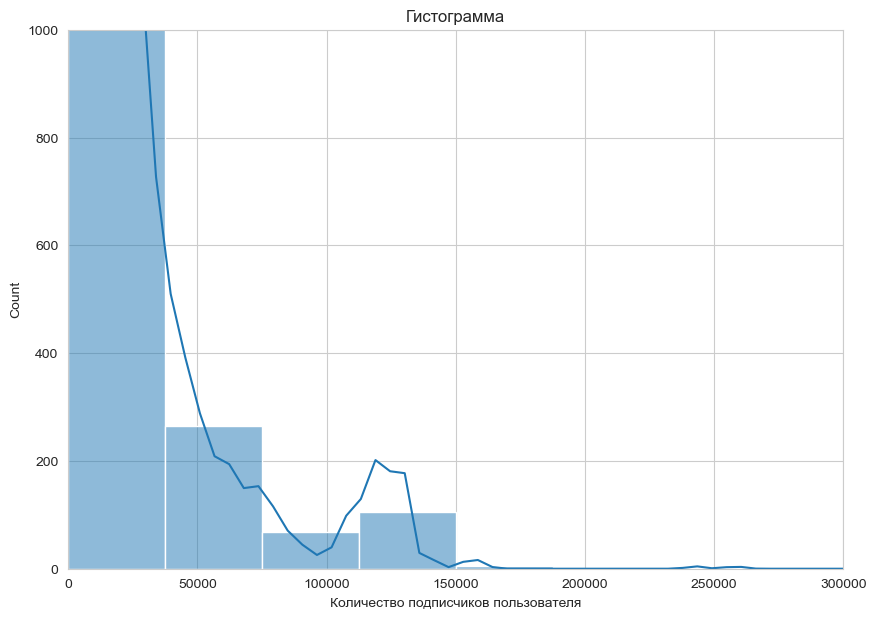

In [9]:
# Строим гистограмму с помощью библиотеки seaborn
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
sns.histplot(x=df['tfol'], kde=True, bins=30)
plt.title('Гистограмма')
plt.xlabel('Количество подписчиков пользователя')
plt.xlim(0, 300000)
plt.ylim(0, 1000)

plt.show()

### 2.4 Построение круговой диаграммы

In [10]:
# Строим круговую диаграмму с помощью библиотеки plotly
data_counts = df['tlength'].value_counts()
fig = px.pie(data_frame=data_counts, names=data_counts.index, values=data_counts.values)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0])  

fig.update_layout(title='Круговая диаграмма')

fig.show()

## Раздел 3: Предобработка текстов
### 3.0 Приведение текста к нижнему регистру

In [11]:
# Приводим все тексты к нижнему регистру  
df['ttext'] = df['ttext'].str.lower()
df.head()

,id,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,unknown,tlength
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0,22
1,408906692693221377,1386325927,alinakirpicheva,"да, все-таки он немного похож на него. но мой ...",1,0,0,0,11825,59,31,2,17
2,408906695083954177,1386325927,EvgeshaRe,rt @katiacheh: ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0,15
3,408906695356973056,1386325927,ikonnikova_21,"rt @digger2912: ""кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0,35
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant вот что значит страшилка :d\nн...,1,0,0,0,597,16,23,1,26


### 3.1 Удаление пунктуации, стоп слов и токенизация

In [12]:
# Удаляем символы, английские слова и стоп-слова и осуществляем токенизацию текстов
stopwords= nltk.corpus.stopwords.words('russian')
df['ttext'] = df['ttext'].apply(lambda x: [word for word in word_tokenize(str(x)) if re.match(r'[а-я]', word) and word not in stopwords])
df.head()

,id,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,unknown,tlength
0,408906692374446080,1386325927,pleease_shut_up,"[школота, поверь, самое, общество, профилирующ...",1,0,0,0,7569,62,61,0,22
1,408906692693221377,1386325927,alinakirpicheva,"[все-таки, немного, похож, мальчик, равно]",1,0,0,0,11825,59,31,2,17
2,408906695083954177,1386325927,EvgeshaRe,"[идиотка, испугалась]",1,0,1,0,1273,26,27,0,15
3,408906695356973056,1386325927,ikonnikova_21,"[углу, сидит, погибает, голода, ещё, порции, в...",1,0,1,0,1549,19,17,0,35
4,408906761416867842,1386325943,JumpyAlex,"[значит, страшилка, блин, посмотрев, части, со...",1,0,0,0,597,16,23,1,26


### 3.2 Лемматизация

In [13]:
# Лемматизируем тексты
morphy = Mystem()
df['ttext'] = df['ttext'].apply(lambda x: [morphy.lemmatize(word)[0] for word in x])
df.head()

,id,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,unknown,tlength
0,408906692374446080,1386325927,pleease_shut_up,"[школоть, поверять, самый, общество, профилиру...",1,0,0,0,7569,62,61,0,22
1,408906692693221377,1386325927,alinakirpicheva,"[все-таки, немного, похожий, мальчик, равно]",1,0,0,0,11825,59,31,2,17
2,408906695083954177,1386325927,EvgeshaRe,"[идиотка, испугаться]",1,0,1,0,1273,26,27,0,15
3,408906695356973056,1386325927,ikonnikova_21,"[угол, сидеть, погибать, голод, еще, порция, в...",1,0,1,0,1549,19,17,0,35
4,408906761416867842,1386325943,JumpyAlex,"[значит, страшилка, блин, посмотреть, часть, с...",1,0,0,0,597,16,23,1,26


## Раздел 4: Получение векторов признаков
### 4.0 Получение вектора признаков с помощью BoW

In [14]:
# Получаем вектора признаков с помощью BoW
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['ttext'].apply(lambda x: ' '.join(x))).toarray()
# Создаем DataFrame с полученными векторами
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow_df.head()

,аа,ааа,аааа,ааааа,аааааа,ааааааа,аааааааа,ааааааааа,ааааааааааа,ааааааааааааа,...,ясноооо,ясный,ятибяобажай,яцутко,яшка,ящик,яя,яяя,яяясно,яяяя
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.1 Получение вектора признаков с помощью TF-IDF

In [15]:
# Получаем вектора признаков с помощью TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['ttext'].apply(lambda x: ' '.join(x))).toarray()
# Создаем DataFrame с полученными векторами
tfidf_df = pd.DataFrame(tfidf, columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,аа,ааа,аааа,ааааа,аааааа,ааааааа,аааааааа,ааааааааа,ааааааааааа,ааааааааааааа,...,ясноооо,ясный,ятибяобажай,яцутко,яшка,ящик,яя,яяя,яяясно,яяяя
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.2 Сохранение полученных векторов в файле

In [16]:
# Сохраняем полученные вектора в csv файлы
bow_df.to_csv('bow.csv', index=False)
tfidf_df.to_csv('tfidf.csv', index=False)